In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pylab as py
from scipy.optimize import curve_fit


In [2]:
#From img 4_34

#(line_length, line_width)
len_width = [ (24, 7), (25, 2.7), (30, 5.5), (21, 2.3), (15, 2.3), (8, 2.3), (29, 5.5), (29, 2.7), (24, 7), (4, 1.8), (29, 3.8),(17, 3.8), (32, 3.8),  (14, 2.5), (14, 2.5), (40, 2.5), (36, 5), (28, 5), (32, 2.5), (11, 1.5), (26, 1.5), (19, 1.5), (30, 10.5), (37, 10), (20, 10), (25, 10), (14.7, 2.4), (18, 2.4), (21, 2.4), (11, 2.4)  ,(32, 10), (25, 10), (61, 10), (49, 2.3), (16, 2.3),  (29, 2.3), (13, 2.3), (20, 2.3), (25, 2.3), (11, 2.2), (18, 2.2), (24, 2.2), (49, 10), (82, 10), (49, 10 ), (52, 10), (11, 10), (9, 1.8), (6, 1.8), (3.4, 1.8), (6.5, 1.8), (27, 7), (18, 7),(14, 1.8) , (18, 1.8),  (28, 2), (8, 2) , (17, 2), (16, 3.4), (15,3.5 ),  (22, 7), (15, 3), (29 ,2), (10, 2), (9, 2),(42, 8), (29, 8), (15, 8), (35, 2), (67, 12.8), (110, 11.1), (60.3, 21), (75, 29), (26, 13.5), (38, 14.8), (62, 3.8), (8, 1.3), (3, 1.3), (5, 1.2), (7, 1.3), (6, 1), (23, 3), (26, 3.2), (12, 3), (8, 3), (28.5, 3), (55, 13.5), (38,13.5), (21, 14), (32, 2), (13, 1), (19, 1), (9, 1), (10, 1), (14, 1), (11, 1), (15, 1), (8, 1), (63, 13.5), (80,13.5 ),  (71, 13.5), (18, 2), (15, 2), (10, 2), (37, 9), (22, 2.5), (17, 2.5), (16.5, 2.5), (44, 8), (17, 8) , (14, 2), (6, 2) , (20, 2), (22, 2), (22, 2), (22, 2), (16, 2), (14, 2), (22, 2), (25, 7.5), (25, 7.5), (33, 7.5), (30, 2), (15, 2), (12, 2), (10, 5), (23, 5), (29,5 ), (26, 4), (33, 4), (36, 4), (16, 4),(13, 4), (12, 4), (23, 15), (22, 3.5), (22, 3.5), (35, 2), (26, 2), (12, 2), (13, 2.5), (29, 2.5), (18, 1), (21, 1), (15, 1), (17, 1), (51, 11), (52, 11), (59, 11), (55,17), (15, 4.6), (22, 4.5), (12, 4.5), (12, 2), (6, 2), (12, 2), (50, 16), (39, 14), (17, 2), (19, 2), (11, 2), (23, 2), (44, 15), (39, 15), (51, 9.5), (54, 9.5), (14, 9.5), (36, 9.5), (18,  9.5), (20, 9.5), (13, 4.5), (17, 4.5), (23, 3.5), (11, 3.5), (17, 8.5), (21, 8.5), (66, 8.5), (12, 2.5), (12,2.5 ), (17, 2.5), (11, 1.5), (12, 1.5), (5,1 ), (6, 1), (25, 9.5), (21, 9.5), (32, 9)]

#number of lines before bifurcation
lines_till_bifurc = [3, 2, 2, 3, 3, 3, 2, 1, 3, 3, 1, 3, 3, 5, 3, 7, 3, 4,  2, 5, 2, 3, 4, 2, 4 ,1, 3, 3, 1,  3, 2, 2, 4, 2, 1, 3, 6, 3, 1, 4, 4, 3, 3, 2, 3, 2, 9, 3, 2, 3, 6, 1, 2, 1, 2, 1, 2, 1,1, 1, 3 , 3, 1, 3, 1, 2, 1, 4, 6, 2, 4, 3, 5, 3, 2, 2]

#højre: +, venstre: -
#angle when no bifurc happens
angles = [5, 12-52, 78+13,31-2, 87-56,-4-39, -31-42, 77-90-5,-16-9, 9+24,-20-48, 49-5, -3-20, -20-12, 12+35, 3-68, 66-3, 31+19, -19-9, -57-4, -6-60, 61-30, 58-82, -5-10, 10+4, -4-10, 82-24, 7 -79, 79-39, 39-15, 37-60, 37-28, 90-14, -90, -180+55+29, -23,  -11-42 , -86+ 12,76-47, 3-33,180-74+37, -34-38, 11+3, 79-59 , -17-11, 19+17, -20, 85, -(80-55), -1, 24-80, 80-2, 2-50, -35-45, -7, 50+5, 80, -15-95, 27-30, 75-35, 0, 20+24, -22-30, -30-13, 68-55, -35-30, 78-67, 12+27, 50-89, 89-67, 85-47, -33-14, 87-7,  22+33, -46, 24+35, -24-30,  55, -50,  40, -35, -19-29, 5-60, -40, 86-46, 4+73, -45, -36-19, 21+55, -55-10, 100, 21+11, 45-65, 62-57, 90-57+5, 2-24, 18-2, 81-53, -27-11, 28, 13+38, -51-35,83-40, 12-5,  62-60, 29+12, -13-55, -29-11, 11+40, 51-18, 10-70, -52-6, 37-84, 57-37, 48-14, 17-48, 53-80, -40-11]#[80-71, 94-8,  82-50, 84-23, 80-2, 1-50, 60+48, 90-50-35]

In [3]:
len_width_1_24 = [(65, 21), (44, 5), (27, 5), (47, 5), (33, 5), (36, 2.5), (51, 2.5), (15, 2.2), (25, 2.2), (14, 2.2), (85, 17.5), (25, 17.5), (25, 3.5), (28, 3.5), (36, 3.5), (62, 16 ), (31, 16), (56, 16), (100, 5), (62, 20), (53, 16), (39, 27), (19, 3.5), (28, 3.5), (22, 3.5), (30, 3.5) , (29, 9.5), (24, 9.5), (7, 2.1), (20, 2.1), (29, 2.1), (29, 6), (22, 6), (39, 6), (42, 6), (43, 18), (82, 18), (44, 12), (74, 12), (40, 12), (65, 10), (79,  10), (67, 10), (57, 10), (15, 3), (14, 3), (7, 3), (41, 5.7), (17, 5.7), (20, 5), (15, 5), (22,5 ), (19, 1.5), (10, 1.5), (17, 1.5), (110, 12), (49, 12), (65, 7.5), (65, 8), (33, 7.5), (19, 7), (22, 2), (33, 2), (16, 2), (15, 2), (12, 3.2), (45, 3.2)]
lines_till_bifurc_1_24 = [1, 4, 2, 3, 2, 3, 3, 1 , 2 , 4, 2, 3, 4, 3 , 2, 3, 4, 3, 2, 3, 2, 4, 2, 2]
angles_1_24 = [77-35, 12+25, -4, 88-63, -67-2, -180+60, 42-71, 12-33, 61-12, 23 -60, 62-46, 46-74, 4-58, -4-21, 21+2, -2-29, 83-55, -20-55, -12-47, -43-13, 13-9, 58-13, 20-18, 20-40,  -4-6, 6+15, 15-9, 42-3, 3-41, 62-7, -34-42, -6-47, 22-41, -19-13,  10+6, 59 -6, 39-68, -22-31, 7-31, 65-180]

In [4]:
from sklearn.mixture import GaussianMixture

mytest = np.array(angles).reshape(-1,1)


gm = GaussianMixture(n_components=2, random_state=0).fit(mytest)
G = np.random.normal()


c:\Users\nugni\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [5]:
print(gm.means_)
print(gm.weights_)
print(gm.covariances_)
print(gm.precisions_)

[[-46.68106076]
 [ 38.07296841]]
[0.4882134 0.5117866]
[[[569.53799684]]

 [[974.55896059]]]
[[[0.00175581]]

 [[0.00102611]]]


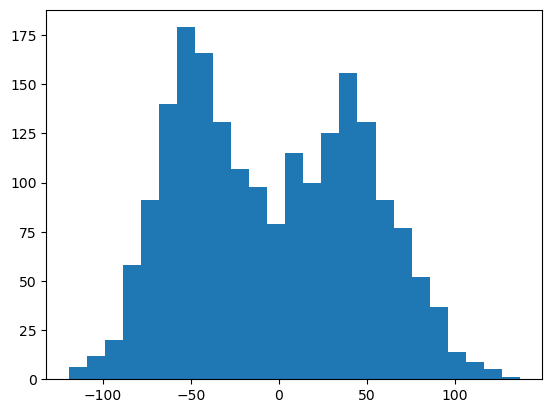

In [6]:
myY = gm.sample(2000)[0]
plt.hist(myY,bins=25)
plt.show()

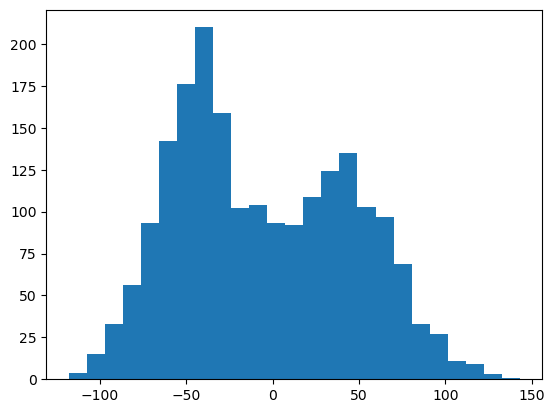

In [7]:
testGM = GaussianMixture(2)

gm_mean = gm.means_
gm_weights = gm.weights_
gm_cov = gm.covariances_
gm_prec = gm.precisions_

testGM.means_ = gm_mean
testGM.weights_ = gm_weights
testGM.covariances_ = gm_cov
testGM.prec = gm_prec

testY = testGM.sample(2000)[0]
plt.hist(testY,bins=25)
plt.show()

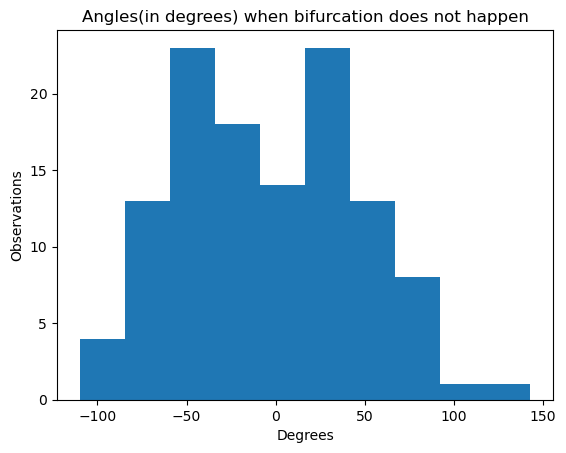

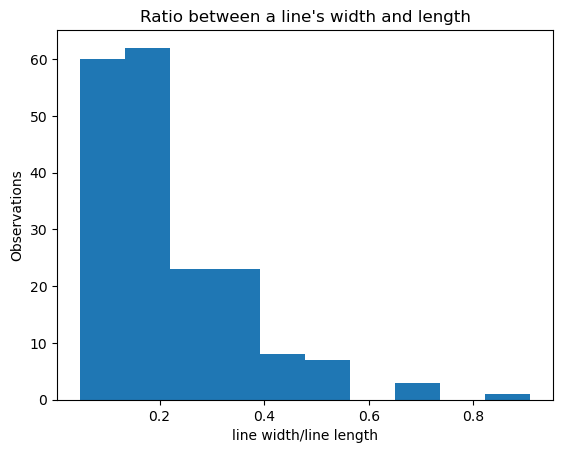

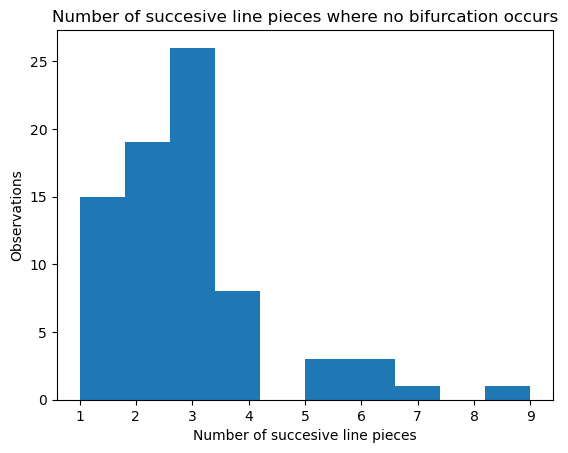

In [8]:
plt.hist(angles)
plt.title("Angles(in degrees) when bifurcation does not happen")
plt.xlabel("Degrees")
plt.ylabel("Observations")
plt.show()
plt.hist([lw[1]/lw[0] for lw in len_width])
plt.ylabel("Observations")
plt.xlabel("line width/line length")
plt.title("Ratio between a line's width and length")
plt.show()
plt.hist(lines_till_bifurc)
plt.ylabel("Observations")
plt.xlabel("Number of succesive line pieces")
plt.title("Number of succesive line pieces where no bifurcation occurs")
plt.show()


Define functions for fitting

In [9]:
# Equation for Gaussian
def gauss(x, mu, sigma, A):
    return A * py.exp(-(x - mu)**2.0 / (2 * sigma**2))

def bimodal(x,mu1,sigma1,A1,mu2,sigma2,A2):
    return gauss(x,mu1,sigma1,A1)+gauss(x,mu2,sigma2,A2)

def lognorm(x, mu, sigma, A):
    return gauss(np.log(x), mu, sigma, A)

Plot probability of a bifurc happening

[ 0.85985131  0.44468643 23.82433097]


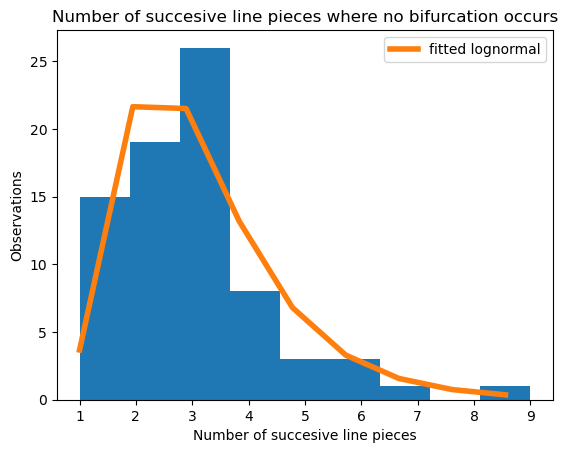

In [30]:
# Generate a
y = lines_till_bifurc
num_bins = 9
data = py.hist(y, bins = num_bins) #normalized

# Generate data from bins as a set of points
x = [0.5 * (data[1][i] + data[1][i+1]) for i in range(len(data[1])-1)]
#x = [1, 2, 3, 4, 5, 6, 7 ,8]
#x = data[1][0:-1]#bins
y = data[0]
#print(data[0])
#print(data[1])

param_guess = (3, 10, 10)

popt, pcov = curve_fit(lognorm, x, y, param_guess)

x_fit = py.linspace(1, x[-1], 9)
y_fit = lognorm(x_fit, *popt)

plt.plot(x_fit, y_fit, lw=4, label="fitted lognormal")
print(popt)
plt.ylabel("Observations")
plt.xlabel("Number of succesive line pieces")
plt.title("Number of succesive line pieces where no bifurcation occurs")
plt.legend()
plt.savefig("line_piece_observations.PNG")


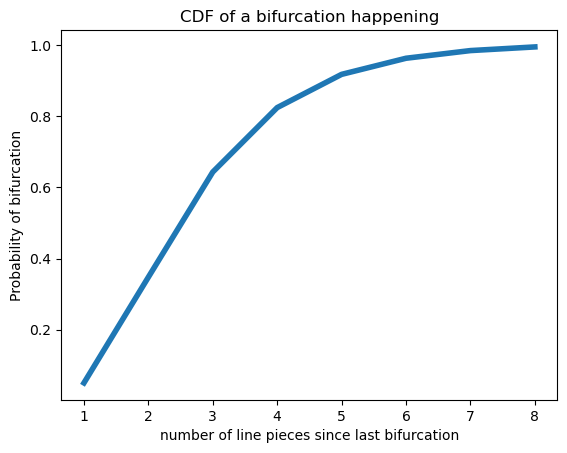

[0.050478367034094807, 0.34784057644329036, 0.6433790517836253, 0.8244599202977467, 0.9179044940685293, 0.9631816767189051, 0.9847343221987497, 0.9950240728678726]


In [31]:
def cdf(x, x_fit, popt):
    y_fit = lognorm(x_fit, *popt)
    normalizer = sum(y_fit)
    return sum(y_fit[0:x])/normalizer


x_arr = np.arange(1, num_bins)
cdf_arr = [cdf(x, x_fit, popt) for x in x_arr]

plt.plot(x_arr, cdf_arr, lw=4)
plt.title("CDF of a bifurcation happening")
plt.xlabel("number of line pieces since last bifurcation")
plt.ylabel("Probability of bifurcation")
plt.show()
print(cdf_arr)

Line width, length ratio

C:\Users\nugni\AppData\Local\Temp\ipykernel_52792\2864409307.py:9: RuntimeWarning: divide by zero encountered in log
  return gauss(np.log(x), mu, sigma, A)


[-2.13673078  0.64277191 34.98816101]


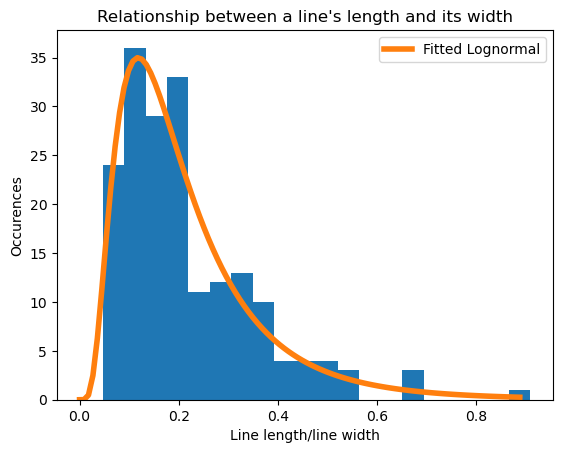

In [12]:
# Generate a
y = [lw[1]/lw[0] for lw in len_width]

num_bins = 20
data = py.hist(y, bins = num_bins)

# Generate data from bins as a set of points
x = [0.5 * (data[1][i] + data[1][i+1]) for i in range(len(data[1])-1)]
y = data[0]

param_guess = (0, 2, 10)

popt, pcov = curve_fit(lognorm, x, y, param_guess)

x_fit = py.linspace(0, x[-1], 100)
y_fit = lognorm(x_fit, *popt)

plt.plot(x_fit, y_fit, lw=4, label="Fitted Lognormal")
plt.title("Relationship between a line's length and its width")
plt.xlabel("Line length/line width")
plt.ylabel("Occurences")
plt.legend()
#plt.show()
plt.savefig("line_width_ratio_obs.PNG")
print(popt)

Model blood vessel angle as 2 gaussian distributions

[-44.16460611  24.51436043  10.08912793  35.81160903  21.59148121
   9.67796345]


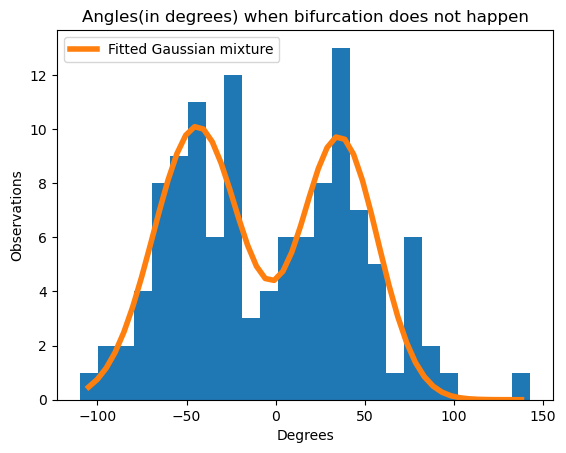

In [13]:
# Generate a
y = angles
num_bins = 25
data = py.hist(y, bins = num_bins)

# Generate data from bins as a set of points
x = [0.5 * (data[1][i] + data[1][i+1]) for i in range(len(data[1])-1)]
y = data[0]

param_guess = (-50, 10, 4, 50, 10, 4)

popt, pcov = curve_fit(bimodal, x, y, param_guess)

x_fit = py.linspace(x[0], x[-1], 50)
y_fit = bimodal(x_fit, *popt)

plt.plot(x_fit, y_fit, lw=4, label="Fitted Gaussian mixture")
plt.title("Angles(in degrees) when bifurcation does not happen")
plt.xlabel("Degrees")
plt.ylabel("Observations")
plt.legend()
plt.savefig("degree_obs.PNG")
print(popt)